# Scratch Implementation of K-Means Clustering

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Function to calculate Euclidean distance

In [2]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2)) ** 2))

### Function for K Means Clustering

In [3]:
def k_means_clustering(data, centroids, k= 2, max_iter= 100, theshold= 1e-4):

    # Initialization
    data = np.array(data)
    centroids = np.array(centroids)
    labels = np.zeros(len(data), dtype= int)


    for i in range(max_iter):
        # Assignment
        for idx, point in enumerate(data):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            labels[idx] = np.argmin(distances)
        
        # Update
        new_centroids = np.zeros_like(centroids)
        for cluster in range(k):
            points = data[labels == cluster]
            if len(points) != 0:
                new_centroids[cluster] = np.mean(points, axis=0)
            else:
                new_centroids[cluster] = centroids[cluster]

        # Convergence Check
        if np.all(np.abs(new_centroids - centroids) < theshold):
            print(f"Algorithm converged at iteration: {i+1}.")
            break
        
        centroids = new_centroids

    return centroids, labels


### Defining initial values

In [4]:
data = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], 
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0], 
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0], 
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1], 
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

init_centroids = np.array([(3.0, 3.0), (2.0, 2.0)])
final_centroids, final_labels = k_means_clustering(data, init_centroids)



Algorithm converged at iteration: 3.


### Initial and final centroids

In [5]:
def get_centroids(centroids):
    for idx, centroid in enumerate(centroids):
        print(f"u{idx+1}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

print(f"Initial values of the centroids are:")
get_centroids(init_centroids)

print(f"Final values of the centroids are:")
get_centroids(final_centroids)

Initial values of the centroids are:
u1: (3.00, 3.00)
u2: (2.00, 2.00)
Final values of the centroids are:
u1: (5.80, 2.12)
u2: (4.20, -0.06)


### Function for scatterplot

In [6]:
colors = [
    "#1f77b4",  # Blue
    "#ff7f0e",  # Orange
    "#2ca02c",  # Green
    "#d62728",  # Red
    "#9467bd",  # Purple
    "#8c564b",  # Brown
    "#e377c2",  # Pink
    "#7f7f7f",  # Gray
    "#bcbd22",  # Yellow-green
    "#17becf",  # Cyan
    "#f4a261",  # Light Orange
    "#ff6f61",  # Coral
    "#a3d4f7",  # Light Blue
    "#ffb6c1",  # Light Pink
    "#32cd32"   # Lime Green
    ]

In [7]:
def plot_clusters(data, centroids, labels, title, k= 2):
    plt.figure(figsize=(6, 6))
    
    for cluster in range(k):
        points = data[labels == cluster]
        plt.scatter(points[:, 0], points[:, 1], color= colors[cluster], s= 40, label= f'Cluster {cluster}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], color= 'black', marker= 'X', s= 50, label= 'Centroids')
    plt.title(f'{title}')
    plt.xlabel('x1')
    plt.ylabel('x2', rotation= 0)
    plt.grid(True)
    # plt.legend()
    plt.show()

### Comparison of initial and final clusters

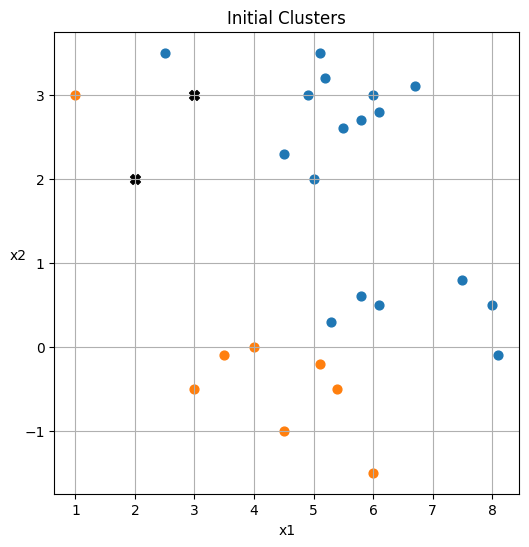

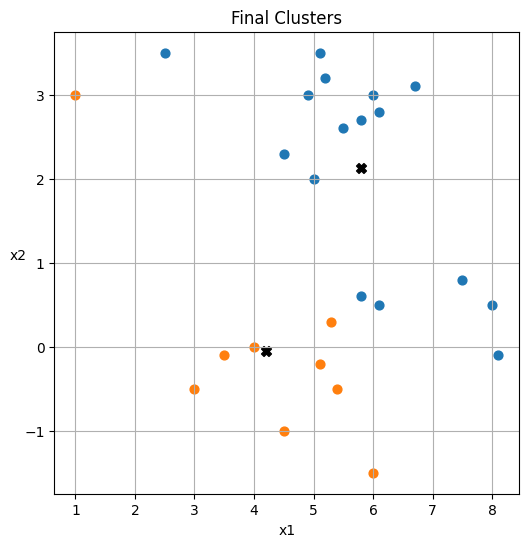

In [8]:
_, init_labels = k_means_clustering(data, init_centroids, max_iter= 1)

plot_clusters(data, init_centroids, init_labels, "Initial Clusters")
plot_clusters(data, final_centroids, final_labels, "Final Clusters")

### Analysis of algorithm with randomly initialized centroids

Algorithm converged at iteration: 2.
Initial values of the centroids are:
u1: (1.07, 1.01)
u2: (4.52, -0.83)
Final values of the centroids are:
u1: (1.75, 3.25)
u2: (5.53, 1.17)


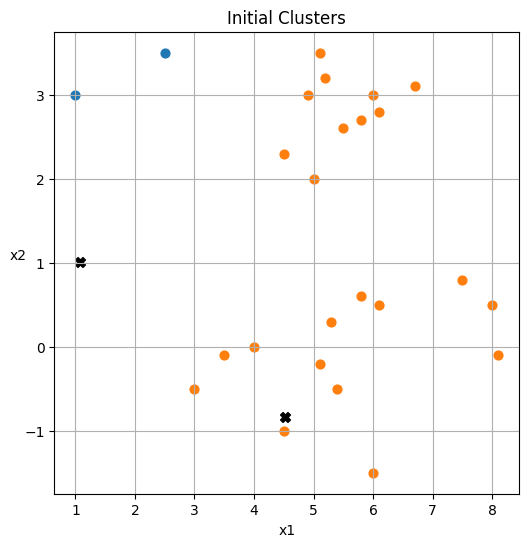

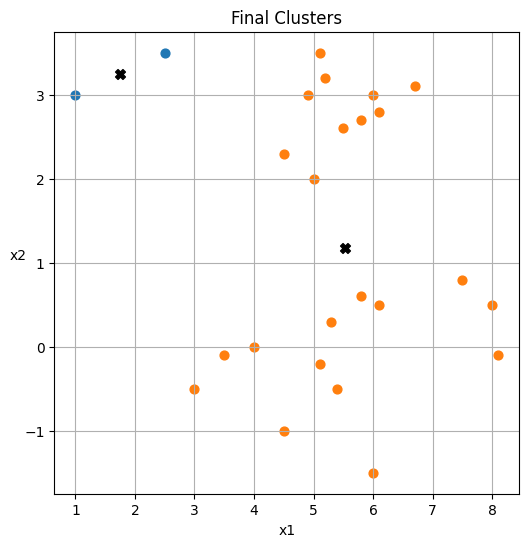

Algorithm converged at iteration: 4.
Initial values of the centroids are:
u1: (2.01, -0.41)
u2: (3.97, -0.26)
Final values of the centroids are:
u1: (2.80, 1.18)
u2: (5.83, 1.38)


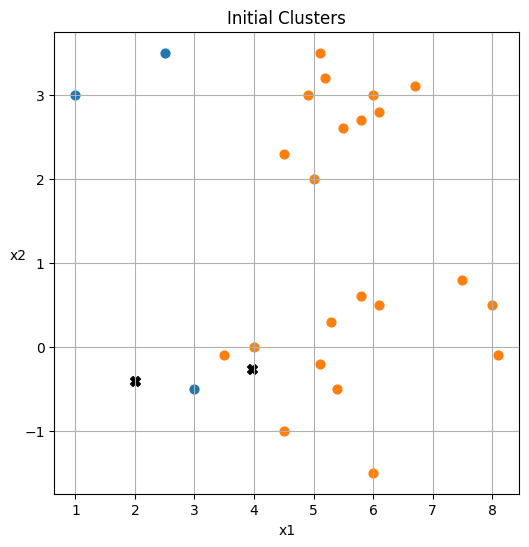

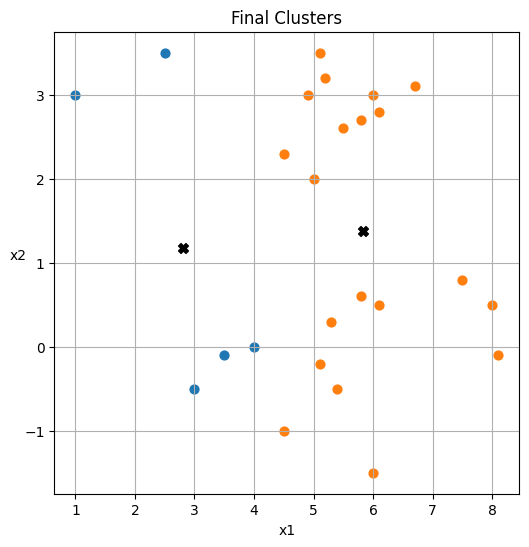

Algorithm converged at iteration: 3.
Initial values of the centroids are:
u1: (1.60, 0.23)
u2: (2.18, 2.89)
Final values of the centroids are:
u1: (5.56, -0.09)
u2: (4.86, 2.89)


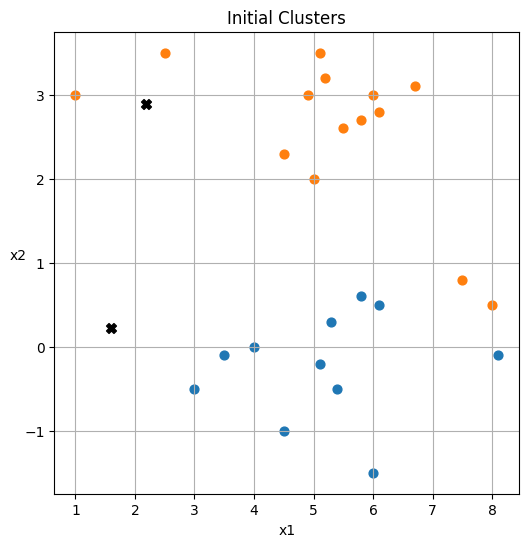

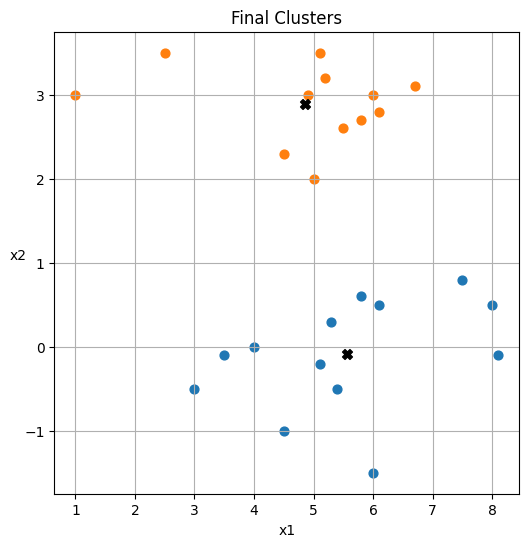

In [9]:
# random initialization of centroids
np.random.seed(9)
min_coordinates = np.min(data, axis=0)
max_coordinates = np.max(data, axis=0)

for _ in range(3):
    init_centroids = np.random.uniform(low= min_coordinates, high= max_coordinates, size= (2, data.shape[1]))
    _, init_labels = k_means_clustering(data, init_centroids, max_iter= 1)
    final_centroids, final_labels = k_means_clustering(data, init_centroids)

    print(f"Initial values of the centroids are:")
    get_centroids(init_centroids)

    print(f"Final values of the centroids are:")
    get_centroids(final_centroids)

    plot_clusters(data, init_centroids, init_labels, "Initial Clusters")
    plot_clusters(data, final_centroids, final_labels, "Final Clusters")



### Function to obtain Within-Cluster Sum of Squares (WCSS)

In [10]:
def get_wcss(data, centroids, labels):
    wcss = 0
    for i, point in enumerate(data):
        centroid = centroids[labels[i]]
        wcss += euclidean_distance(point, centroid) ** 2
    return wcss

### Applying the K-Means clustering for various values of k to obtain the best number of clusters (M)

Algorithm converged at iteration: 2.
Algorithm converged at iteration: 3.
Algorithm converged at iteration: 6.
Algorithm converged at iteration: 7.
Algorithm converged at iteration: 6.
Algorithm converged at iteration: 6.
Algorithm converged at iteration: 6.
Algorithm converged at iteration: 6.
Algorithm converged at iteration: 6.
Algorithm converged at iteration: 5.
Algorithm converged at iteration: 5.
Algorithm converged at iteration: 4.
Algorithm converged at iteration: 6.
Algorithm converged at iteration: 6.
Algorithm converged at iteration: 6.


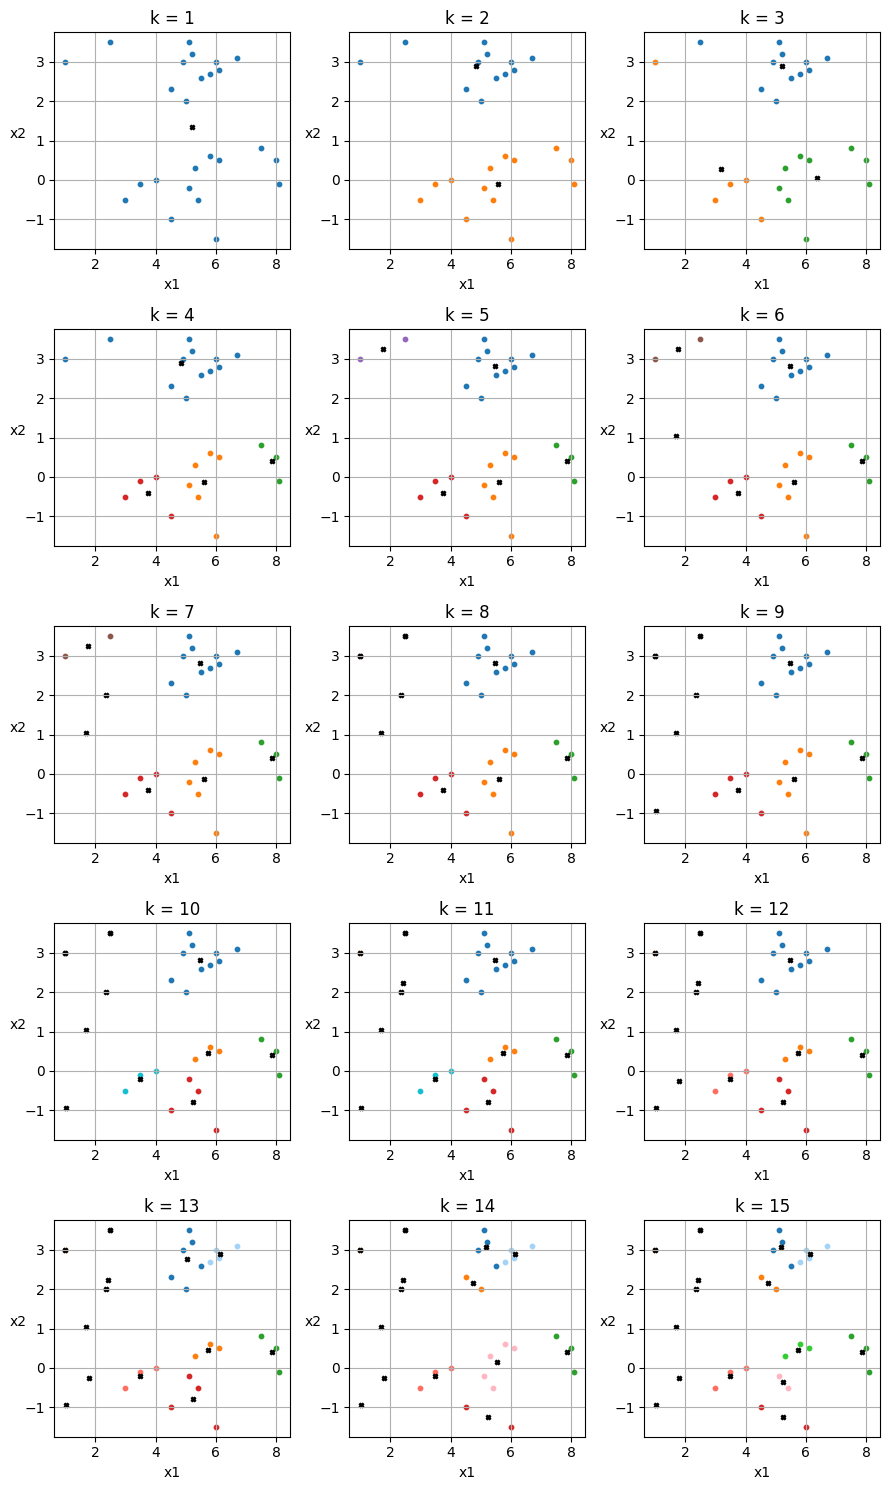

In [11]:
np.random.seed(666)
wcss_list = []
init_centroids = np.random.uniform(low= min_coordinates, high= max_coordinates, size= (15, data.shape[1]))

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(9, 15))
axes = axes.flatten()

for i in range(15):
    final_centroids, final_labels = k_means_clustering(data, init_centroids[:i+1], k= i+1)
    wcss = get_wcss(data, final_centroids, final_labels)
    wcss_list.append(wcss)

    for j in range(i+1):
        points = data[final_labels == j]
        axes[i].scatter(points[:, 0], points[:, 1], color= colors[j], s= 10, label= f'Cluster {j}')
    axes[i].scatter(final_centroids[:, 0], final_centroids[:, 1], color= 'black', marker= 'X', s= 10, label= 'Centroids')
    axes[i].set_title(f"k = {i + 1}")
    axes[i].set_xlabel('x1')
    axes[i].set_ylabel('x2', rotation= 0)
    axes[i].grid(True)
plt.tight_layout()
plt.show()



### Applying the elbow method to the graph plotted below, we conclude M = 5

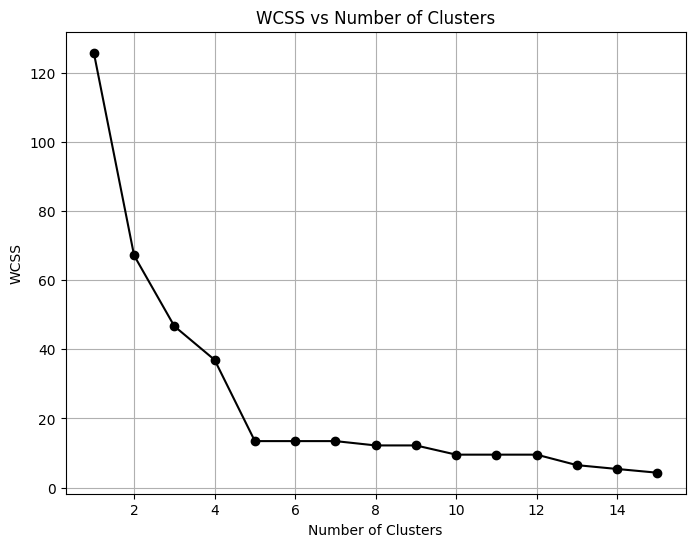

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(list(range(1, len(wcss_list) + 1)), wcss_list, marker='o', linestyle='-', color='black')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS vs Number of Clusters')
plt.grid(True)
plt.show()

Algorithm converged at iteration: 6.
Initial values of the centroids are:
u1: (5.97, 2.72)
u2: (5.80, 2.14)
u3: (7.76, -1.44)
u4: (3.94, -1.26)
u5: (1.71, 1.04)
Final values of the centroids are:
u1: (5.48, 2.82)
u2: (5.62, -0.13)
u3: (7.87, 0.40)
u4: (3.75, -0.40)
u5: (1.75, 3.25)


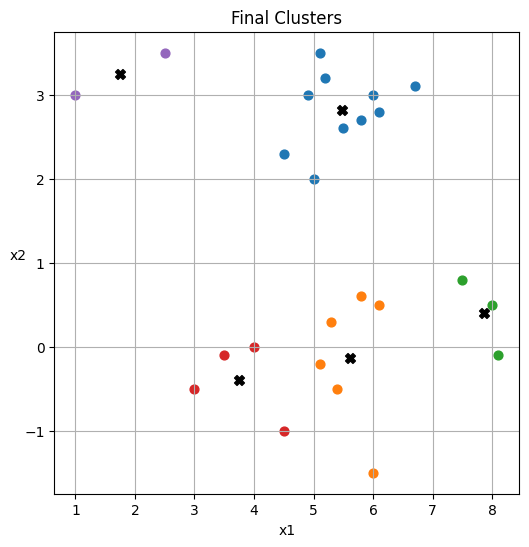

In [13]:
M = 5
np.random.seed(666)
init_centroids = np.random.uniform(low= min_coordinates, high= max_coordinates, size= (M, data.shape[1]))
final_centroids, final_labels = k_means_clustering(data, init_centroids, k= M)

print(f"Initial values of the centroids are:")
get_centroids(init_centroids)
print(f"Final values of the centroids are:")
get_centroids(final_centroids)
plot_clusters(data, final_centroids, final_labels, "Final Clusters", k= M)